In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [19]:
link = 'https://drive.google.com/open?id=1QBZnoHedAcIlVZ3tagAnSZZ6LhXpIScd'
link2= 'https://drive.google.com/open?id=1O16A69Xz5KWNwljGCHRzHTVqvo44VaKH'
fluff, id1 = link.split('=')
fluff, id2 = link2.split('=')
print (id1)
print (id2)# Verify that you have everything after '='
downloaded1 = drive.CreateFile({'id':id1}) 
downloaded2 = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('application_train.csv') 
downloaded.GetContentFile('bureau.csv') 
df1read = pd.read_csv('application_train.csv')
df4read = pd.read_csv('bureau.csv')

1QBZnoHedAcIlVZ3tagAnSZZ6LhXpIScd
1O16A69Xz5KWNwljGCHRzHTVqvo44VaKH


In [0]:
%matplotlib inline
import json
from pprint import pprint
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import numpy as np
import seaborn as sns
from statistics import mean
from matplotlib.pyplot import figure
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
pd.options.display.max_rows = 100
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)
from statistics import mean

# Evaluating the credit worthiness of individuals with non-existent credit histories

1) Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders. Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information to predict their clients' repayment abilities.

2) For this competition, a data dictionary is provided. However, due to the nature of it, I was unable to liaise with business stakeholders to understand deeper some of the variables. My understanding would be restricted to the explanation given (some are rather short). There are variables that are encoded and the explanation do not mean much. This would influence my ability to feature engineer. However, workarounds would be used 

3) The objective of this project is to use a variety of data/information to predict their clients' repayment abilities

4) For this competition, 7 datasets were provided. However, due to computational constraints, working on all 7 would be rather resource demanding. In addition, my purpose of this project was to work on data in a field which i would not usually handle and also to put into practise my knowledge/skills in a new area

In [0]:
df1=df1read.copy()
df4=df4read.copy()

# Datasets used

1. The Application Data contains background information that were given by individuals upon application for credit loans. It encompasses information such as Family, assets owned, education level, employment status.  
<br>  
2. The Bureau Data contains credit information of individuals that are held by the credit bureau. It encompasses information such as current loan ID, previous loan ID, time gap between current and previous loands, credit limit of credit cards reported and annuity of the credit bureau credit.

# Exploring the datasets
## Application Data


2. Firstly basic data sanity checks are done on the Application Data
    - The columns in the Dataframe
    - Any NULL values
    - Any Missing Values  
<br>   
3. Application Data information findings
    - 307511 rows by 122 columns
    - There are plenty of NULL rows in the dataset, meaning that there are quite alot of missing information present, which in the next section further analysis would be carried out

In [0]:
def Datacheck(df):
        return df.shape,df.columns,df.isnull().any(),

In [22]:
Datacheck(df1)

((307511, 122),
 Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
        'AMT_CREDIT', 'AMT_ANNUITY',
        ...
        'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
        'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR'],
       dtype='object', length=122),
 SK_ID_CURR                     False
 TARGET                         False
 NAME_CONTRACT_TYPE             False
 CODE_GENDER                    False
 FLAG_OWN_CAR                   False
 FLAG_OWN_REALTY                False
 CNT_CHILDREN                   False
 AMT_INCOME_TOTAL               False
 AMT_CREDIT                     False
 AMT_ANNUITY                     True
 AMT_GOODS_PRICE                 True
 NAME_TYPE_SUITE                 Tr

### What variables are important/selected?

1. The data dictionary contains the description of all the 122 columns found in the application dataset. However, there are quite a number of columns where there are insufficient information given from the descriptors. These would include cases like housing information and whether applicant has provided certain documents.  

2. In addition, the large number of columns with missing dataset might pose a problem in the modelling process and might be unusable. These columns with missing data would need to be dealt with, through imputation or dropping whole columns totally.  

3. Despite the missingness, some variables might hold important information on the credit worthiness of an individual. As such, it will still be assessed on a case by case basis.  
  
3. In the next section, analysis on the missing values will be done

### Analysing Missing Values

1. Initial check revealed many variables with null values  

2. To take a closer look, a function is written to scan through the variables and return the percentage missing values
    - There are 122 columns and out of these 67 columns have missing values.
    - The missing values had columns with up to 69.9% missing.   

3. On closer inspection with reference to the data dictionary, large portion of the missing values are Housing information. Typically, credit scores are used by lenders when trying to assess the application to determine the risk that is undertaken,ie the creditworthiness of an individual.  

4. Usually, housing information would be taken into consideration as it is a huge financial involvement. An individual with huge housing loans to their salary/income inflow will usually be considered as a higher risk applicant by lending agencies. This in turn would affect the credit score of individuals.

**According to Credit Bureau Singapore website:**
> A credit Score is a number used by lenders as an indicator of how likely an individual is to repay his debts and the probability of going into default. It is an independent assessment of the individual's risk as a credit applicant.

In [23]:
# Taking a closer look at variables with null values
df1.columns[df1.isna().any()].tolist()

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',

In [0]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [25]:
missing_values = missing_values_table(df1)
missing_values.head(67)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### Housing Information
1. Almost 50% of the Application data have missing data in the columns. Moreover, most of them are housing related information and they are missing to a large degree where imputation methods would not be feasible without introducing assumptions and bias into the dataset.  

2. In order to get a sensing if housing information did have a significant impact on the default rate, I decided to use a statistical test to make a decision on whether having a larger proportion of housing information missing resulted in a significant difference in the default rate  

3. Lets analyse the missing housing information
    - The percentage of missing values ranged from 69.9% to 48.% for the housing features
    - The percentage of applicant housing information missingness ranges from 4.9% to 55%. There were no applications with 100% housing information
    - In credit analysis, an individual's housing information plays a huge part on whether a person is able to return the loan taken.
    - A highly valued property would mean that the individual has a level of financial strength 
    - However, an individual's leverage (based on other mortgages, outstanding loands, houshold liabilities) also needs to be taken into consideration
    - By taking the mean of default ratio, we can see that there is a difference here. Applicants who did not fill in more than 50% of the forms are ~20% more likely to default.  

4. Due to a huge range of missingness, a simple hypothesis test is done to ascertain if this difference in default ratio is statistically significant
    - 30% housing information missingness is determined to be the cutoff for complete or incomplete housing information.Applcations with less than 30% missing housing information would be considered as completed.
    - <b>Null hypothesis</b>: Assumes that there is no association between the completeness of Housing Information and mean default rate.
    - <b>Alternative hypothesis</b>: Assumes that there is an association between the two variables.  

5. The null hypothesis states that there is no statistical significance in the difference in the mean default rate between the 2 application groups (incomplete=1/0)
    - Using Chi-Square test, Null Hypothesis is rejected. There is a statistically significant difference between the 2 groups.
    - This engineered feature that indicates whether application is above a certain threshold could be taken into account when building models.


#### Statistical Testing for Housing Data Missing Values

In [0]:
# Looking at the Min and Max filled rate across the rows
def applicationinfo_missing(df):
        # Total filled columns for each row
        applicantmis_max=(max(df[missing_values.index].count(axis=1)))/122*100
        applicantmis_min=(min(df[missing_values.index].count(axis=1)))/122*100
        
        # Print some summary information
        print ("MAX missing application info: {} ".format(applicantmis_max) + "\n"      
            "MIN missing application info: {} ".format(applicantmis_min))


In [0]:
applicationinfo_missing(df1)

MAX missing application info: 54.91803278688525 
MIN missing application info: 4.918032786885246 


In [0]:
#creating a new column to indicate if application is considered complete. 
# since most of the Housing information are >50% incomplete, set threshold as 50%
df1['housingincomplete'] = 1
df1.loc[df1.isnull().sum(axis=1) < 30, 'housingincomplete'] = 0

mean_c = np.mean(df1.loc[df1['housingincomplete'] == 0, 'TARGET'].values)
mean_i = np.mean(df1.loc[df1['housingincomplete'] == 1, 'TARGET'].values)
print('default ratio for more complete applications: {:.2} \ndefault ratio for less complete applications: {:.2}'.format(mean_c, mean_i))

default ratio for more complete applications: 0.069 
default ratio for less complete applications: 0.091


In [0]:
from scipy.stats import chisquare

arrayinput = pd.crosstab(df1.housingincomplete, df1.TARGET)
output = chisquare(arrayinput)
print(arrayinput, "\n p-value= ", output[1])

TARGET                  0      1
housingincomplete               
0                  136641  10153
1                  146045  14672 
 p-value=  [5.25736999e-070 6.54231577e-181]


## Number of Credit enquiries before current application
### Analyzing the AMT_REQ_CREDIT_BUREAU_YEAR/QRT/MON/HOUR/WEEK/HOUR

1. Enquiry Activity refers to the number of new application enquiries found in an individual's credit. Whenever there is a new loan application(credit card, loan facilities), a potential bank/financial institution will make an enquiry into the individual's credit report. A higher credit query would indicate a riskier behaviour, as more debt is being acquired by the individual. We would like to capture this information in the data.

2. Having too many enquiries into the credit report would indicate to lenders that I am trying to take on more debt, and thus increasing credit exposure.

3. There are 2 ways to look into this

> a) **Segmenting the applicants based on frequency of query**. We can observe the average daily query frequency ( over last month, week, day), and give a ranking to each individual with respect to the population of applicants. Above a certain frequency ( <25%), they would be ranked differently from (75%-25%) and those with (>75%) frequency. By doing so, we are ranking individuals based on how frequent they are taking a loan. 

>b) **Changes in frequency of query over the months**. However, the above method would be limited as frequency on taking loan itself is contigent on factors like age, income etc. We would also like to analyze and capture the recent query patterns, ie. if there are any large deviation from the norm frequency of each individual. In order to do so, one possible method would be to derive ratios between their average daily frequency between month/week, week/day.   


In [0]:
list=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']
df_creditqueries=df1.loc[:,list]
df_creditqueries['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()
df_creditqueries['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()
df_creditqueries['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()
df_creditqueries['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

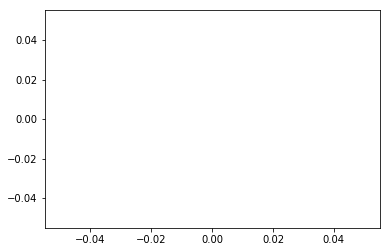

In [0]:
sns.distplot(df_creditqueries['AMT_REQ_CREDIT_BUREAU_DAY'],hist=True)

### 1st Cut Removing Columns with Large Missing Values

1. After going through the variables/columns, it is decided that even if we tried imputation methods, it would not be feasible to recover the missing housing information. In addition, we would be making assumptions of the distribution based off other features.   
<br>
2. With reference to the the Percentage missing table above, only variables with >1% missing and above would be dropped except "OWN_CAR_AGE"
    - Reason for keeping "OWN_CAR_AGE" is due to the fact that after initial assessment of the missing variables, there could be a possibility that the missingness is due to the applicants not owning any car. As such, further analysis would be done on the "FLAG_OWN_CAR".
    - The analysis indeed showed that missing values in "OWN_CAR_AGE" were due to applicants not owning cars. These would be imputed with zeros. In addition, there are 5 applicants that own cars but did not indicate age, which was imputed with median.  
    - Median was chosen because of the skewed distribution of the age which applicants own a car. A mean imputation would be greatly affected by the large degree of skewness and possible outliers.  
<br>
3. The other missing variables (with <1% missingness) would be imputed with the mean values

In [0]:
missing_values_var=list(missing_values.index[missing_values['% of Total Values']>5])
len(missing_values_var)
missing_values_keep={'OWN_CAR_AGE'}
missing_values_var=[i for i in missing_values_var if i not in missing_values_keep]
len(missing_values_var)
missing_values_var
# unwanted = {'item', 5}
# item_list = [e for e in item_list if e not in unwanted]

57

56

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_MODE',
 'TOTALA

In [0]:
df1=df1.drop(columns=missing_values_var)

In [0]:
missing_values_table(df1).head(19)

Your selected dataframe has 67 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
OWN_CAR_AGE,202929,66.0
NAME_TYPE_SUITE,1292,0.4
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


#### OWN_CAR_AGE

In [0]:
df1['OWN_CAR_AGE'].count()
df1['FLAG_OWN_CAR'][df1['FLAG_OWN_CAR']=='Y'].count()
# there are indeed rows where the applicants own cars but the own car age is null
print('applicants own car and indicate car age:',df1['OWN_CAR_AGE'][(~df1['OWN_CAR_AGE'].isnull()) & (df1['FLAG_OWN_CAR']=='Y')].count())
print('applicants own car but did not indicate car age:',df1['OWN_CAR_AGE'][(df1['OWN_CAR_AGE'].isnull()) & (df1['FLAG_OWN_CAR']=='Y')].isna().count())

104582

104587

applicants own car and indicate car age: 104582
applicants own car but did not indicate car age: 5


In [0]:
# impute 0 to OWN_CAR_AGE where applicants do not own cars
df1.update(df1['OWN_CAR_AGE'][df1['FLAG_OWN_CAR']=='N'].fillna(0))
# ensuring values have been imputed
df1[(df1['OWN_CAR_AGE'].isnull()) & (df1['FLAG_OWN_CAR']=='Y')]['OWN_CAR_AGE']
np.where([(df1['OWN_CAR_AGE'].isnull()) & (df1['FLAG_OWN_CAR']=='Y')])

30897    NaN
181231   NaN
217549   NaN
229867   NaN
236868   NaN
Name: OWN_CAR_AGE, dtype: float64

(array([0, 0, 0, 0, 0], dtype=int64),
 array([ 30897, 181231, 217549, 229867, 236868], dtype=int64))

<Figure size 2400x640 with 0 Axes>

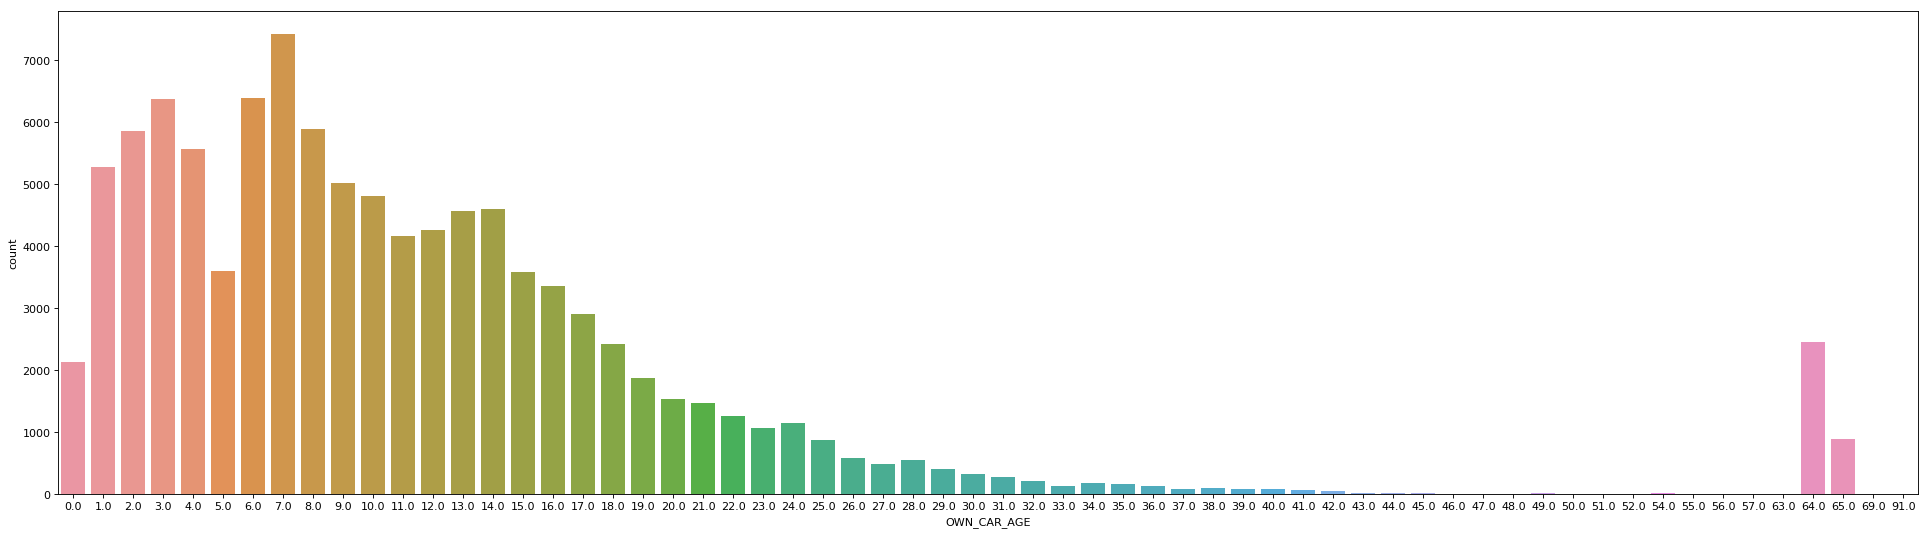

In [0]:
figure(num=None, figsize=(30, 8), dpi=80, facecolor='w', edgecolor='k')
ax2=sns.countplot(x=(df1['OWN_CAR_AGE'][df1['FLAG_OWN_CAR']=='Y']))

> Majority of the car age falls under the main right-skewed distribution, with outliers at 64-66 years car age.
> We will impute the 5 missing values with the median of this distribution due to the skewness and presence of outliers in the data. 

In [0]:
# checking the calculation of median value
df1['OWN_CAR_AGE'][(df1['FLAG_OWN_CAR']=='Y')].median()

# imputing with the median of the distribution
df1.update(df1[(df1['OWN_CAR_AGE'].isnull()) & (df1['FLAG_OWN_CAR']=='Y')]['OWN_CAR_AGE'].fillna(df1['OWN_CAR_AGE'][(df1['FLAG_OWN_CAR']=='Y')].median()))

9.0

### Dealing with the remaining columns with missing values 
1. univariate distribution of these columns would be explored to determine the correct imputation method. In the event of large degree of skewness or outliers, mean imputation would be used. 

#### NAME_TYPE_SUITE & EXT_SOURCE_2	

NAME_TYPE_SUITE
- Who was accompanying client when he was applying for the loan
- A huge proportion of the data are unaccompanied. In addition, there are categories like Other_A and other_B which do not have descriptions
- Will be dropped

EXT_SOURCE_2
- Normalized score from external data source
- Will be dropped

In [0]:
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [0]:
df1.drop(['NAME_TYPE_SUITE','EXT_SOURCE_2'],axis=1,inplace=True);

#### AMT_ANNUITY

- Loan Annuity
    -  monthly payment that client will pay to Home Credit(interest rate included)

In [0]:
# figure(num=None, figsize=(30, 8), dpi=80, facecolor='w', edgecolor='k')
# ax3=sns.countplot(x=(df1['AMT_ANNUITY']))

In [0]:
df1.update((df1['AMT_ANNUITY']).fillna((df1['AMT_ANNUITY']).median()))

#### DAYS_LAST_PHONE_CHANGE

In [0]:
df1.update((df1['DAYS_LAST_PHONE_CHANGE']).fillna((df1['DAYS_LAST_PHONE_CHANGE']).median()))

#### CNT_FAM_MEMBERS

In [0]:
df1.update((df1['CNT_FAM_MEMBERS']).fillna((df1['CNT_FAM_MEMBERS']).median()))

#### OBS_**_CNT_SOCIAL_CIRCLE / DEF_**_CNT_SOCIAL_CIRCLE

In [0]:
social_circle=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
for j in social_circle:
    df1.update(df1[j].fillna((df1[j]).median()))
    print(df1[j].median())

0.0
0.0
0.0
0.0


#### AMT_GOODS_PRICE

In [0]:
df1.update((df1['AMT_GOODS_PRICE']).fillna((df1['AMT_GOODS_PRICE']).median()))

### Check for Class Balance

ratio of non-defaults to defaults 0.08781828601345662


Text(0,282689,'91.93')

Text(1,24828,'8.07')

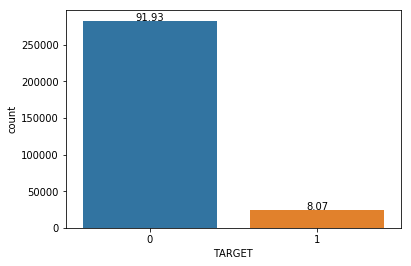

In [0]:
ax=sns.countplot(x='TARGET',data=df1)
print('ratio of non-defaults to defaults',(df1[df1['TARGET']==1]['TARGET'].count())/(df1[df1['TARGET']==0]['TARGET'].count()))
for p in ax.patches:
    height = p.get_height()
    total= len(df1)
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total*100),
            ha="center") 

- The class imbalance needs to be dealt with before modelling

# Bureau Data
- Contains information about the client's previous loans with other financial institutions reported to Home Credit
- Each previous loan has its own rows

## Preliminary Checks

In [0]:
Datacheck(df4)

((1716428, 17),
 Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
        'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
        'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
        'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
        'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
        'AMT_ANNUITY'],
       dtype='object'),
 SK_ID_CURR                False
 SK_ID_BUREAU              False
 CREDIT_ACTIVE             False
 CREDIT_CURRENCY           False
 DAYS_CREDIT               False
 CREDIT_DAY_OVERDUE        False
 DAYS_CREDIT_ENDDATE        True
 DAYS_ENDDATE_FACT          True
 AMT_CREDIT_MAX_OVERDUE     True
 CNT_CREDIT_PROLONG        False
 AMT_CREDIT_SUM             True
 AMT_CREDIT_SUM_DEBT        True
 AMT_CREDIT_SUM_LIMIT       True
 AMT_CREDIT_SUM_OVERDUE    False
 CREDIT_TYPE               False
 DAYS_CREDIT_UPDATE        False
 AMT_ANNUITY                True
 dtype: bool

### Analysing Missing Values

1. After going through the variables/columns, it is decided that the features with >1% missing would be dropped.
<br>
2. The other missing variables would be imputed with the mean values

In [0]:
missing_values2 = missing_values_table(df4)
missing_values2

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


### 1st cut remove Missing Data

In [0]:
missing_values_var2=list(missing_values2.index[missing_values2['% of Total Values']>5])
len(missing_values_var2)
missing_values_var2
# unwanted = {'item', 5}
# item_list = [e for e in item_list if e not in unwanted]

6

['AMT_ANNUITY',
 'AMT_CREDIT_MAX_OVERDUE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_DEBT',
 'DAYS_CREDIT_ENDDATE']

In [0]:
df4=df4.drop(columns=missing_values_var2)

In [0]:
df4.update((df4['AMT_CREDIT_SUM']).fillna((df4['AMT_CREDIT_SUM']).median()))


### Simple Feature Engineering

1. SK_ID_CURR: ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit.   
<br>
2. SK_BUREAU_ID: Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application).  
<br>
3. I am generating a new feature which counts the total previous loan for each loan ID in each row.

In [0]:
## TO check that the previous Loan IDs are unique
any(df4['SK_ID_BUREAU'].duplicated())
# Generate the number of previous applications for each applicant ID
previous_loans=df4.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count()
previous_loans.rename(columns={'SK_ID_BUREAU': 'previous_loan_counts'},inplace=True)
# Merge with the Bureau Data left join on ID
df4.merge(previous_loans,on='SK_ID_CURR', how ='left')

False

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,previous_loan_counts
0,215354,5714462,Closed,currency 1,-497,0,0,91323.000,0.0,Consumer credit,-131,11
1,215354,5714463,Active,currency 1,-208,0,0,225000.000,0.0,Credit card,-20,11
2,215354,5714464,Active,currency 1,-203,0,0,464323.500,0.0,Consumer credit,-16,11
3,215354,5714465,Active,currency 1,-203,0,0,90000.000,0.0,Credit card,-16,11
4,215354,5714466,Active,currency 1,-629,0,0,2700000.000,0.0,Consumer credit,-21,11
5,215354,5714467,Active,currency 1,-273,0,0,180000.000,0.0,Credit card,-31,11
6,215354,5714468,Active,currency 1,-43,0,0,42103.800,0.0,Consumer credit,-22,11
7,162297,5714469,Closed,currency 1,-1896,0,0,76878.450,0.0,Consumer credit,-1710,6
8,162297,5714470,Closed,currency 1,-1146,0,0,103007.700,0.0,Consumer credit,-840,6
9,162297,5714471,Active,currency 1,-1146,0,0,4500.000,0.0,Credit card,-690,6


# Merging both Datasets

In [0]:
traindf=df1.merge(df4, on='SK_ID_CURR',how='left')
#testdf=df2.merge(df4, on='SK_ID_CURR',how='left')

In [0]:
traindf.columns
traindf.shape
traindf.dtypes
traindf.reset_index();

- From my own personal research, credit companies that potentially make the loan would access applicants based on their credit score. In this case, it is maintained by the credit bureau

In [0]:
traineda=traindf.sample(20000)

# EDA

## Gender 

- We first look at the Gender distribution in the data. As seen, about 69% of the applicants are females and 31% of the applicants are males 
- There is a category 'XNA' which has no meaning and it was dropped from the dataset.


In [0]:
ax=sns.countplot(x='CODE_GENDER',data=traineda)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(traineda)),
            ha="center")
    
traineda.groupby(['CODE_GENDER'])['CODE_GENDER'].count()
'Female proportion {:0.2f}%'.format(traineda.groupby(['CODE_GENDER'])['CODE_GENDER'].get_group('M').count()/len(traineda)*100)
'Male proportion {:0.2f}%'.format(traineda.groupby(['CODE_GENDER'])['CODE_GENDER'].get_group('F').count()/len(traineda)*100)


## Gender VS Target

- Looking at the Gender distribution wrt to whether TARGET is 1 or 0 (client repayment difficulties)
-  he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample

In [0]:
traindf=traindf[traindf['CODE_GENDER']!='XNA'].reset_index()

In [0]:
ax2=sns.catplot(x='CODE_GENDER',col='TARGET',kind='count',data=traineda)


In [0]:
traineda.groupby(['TARGET','CODE_GENDER'])['CODE_GENDER'].count()/len(traineda)*100
'Ratio of Female to Male Defaulters is {:0.2f} times'.format(traineda.groupby(['TARGET','CODE_GENDER'])['CODE_GENDER'].get_group((1,'F')).count()/traineda.groupby(['TARGET','CODE_GENDER'])['CODE_GENDER'].get_group((1,'M')).count())
'Ratio of Female to Male Non Defaulters is {:0.2f} times'.format(traineda.groupby(['TARGET','CODE_GENDER'])['CODE_GENDER'].get_group((0,'F')).count()/traineda.groupby(['TARGET','CODE_GENDER'])['CODE_GENDER'].get_group((0,'M')).count())
'Ratio of Female Defaulters to Female Non-defaulters is {:0.2f} times'.format(traineda.groupby(['TARGET','CODE_GENDER'])['CODE_GENDER'].get_group((1,'F')).count()/traineda.groupby(['TARGET','CODE_GENDER'])['CODE_GENDER'].get_group((0,'F')).count())
'Ratio of Male Defaulters to Male Non-Defaulters is {:0.2f} times'.format(traineda.groupby(['TARGET','CODE_GENDER'])['CODE_GENDER'].get_group((1,'M')).count()/traineda.groupby(['TARGET','CODE_GENDER'])['CODE_GENDER'].get_group((0,'M')).count())

- Despite Females making up a larger proportion, they could potentially be less likely to default compared to Males. This could be confirmed with a chi-square test

## Family Status by Gender

In [0]:
ax3=sns.catplot(x='NAME_FAMILY_STATUS',col='CODE_GENDER',kind='count',data=traineda)
ax3.set_xticklabels(rotation=30)

In [0]:

traineda.groupby(['NAME_FAMILY_STATUS','CODE_GENDER'])['CODE_GENDER'].count()
'Under Civil Marriage, Ratio of Female to Male is {:0.2f} times'.format(traineda.groupby(['NAME_FAMILY_STATUS','CODE_GENDER'])['CODE_GENDER'].get_group(("Civil marriage","F")).count()/traineda.groupby(['NAME_FAMILY_STATUS','CODE_GENDER'])['CODE_GENDER'].get_group(("Civil marriage","M")).count())
'Under Seperated, Ratio of Female to Male Non Defaulters is {:0.2f} times'.format(traineda.groupby(['NAME_FAMILY_STATUS','CODE_GENDER'])['CODE_GENDER'].get_group(("Separated","F")).count()/traineda.groupby(['NAME_FAMILY_STATUS','CODE_GENDER'])['CODE_GENDER'].get_group(("Separated","M")).count())
'Under Single, Ratio of Female to Male Non Defaulters is {:0.2f} times'.format(traineda.groupby(['NAME_FAMILY_STATUS','CODE_GENDER'])['CODE_GENDER'].get_group(("Single / not married","F")).count()/traineda.groupby(['NAME_FAMILY_STATUS','CODE_GENDER'])['CODE_GENDER'].get_group(("Single / not married","M")).count())
'Under Widow, Ratio of Female to Male Non Defaulters is {:0.2f} times'.format(traineda.groupby(['NAME_FAMILY_STATUS','CODE_GENDER'])['CODE_GENDER'].get_group(("Widow","F")).count()/traineda.groupby(['NAME_FAMILY_STATUS','CODE_GENDER'])['CODE_GENDER'].get_group(("Widow","M")).count())

## Family Status VS Target

In [0]:
ax4=sns.catplot(x='NAME_FAMILY_STATUS',col='TARGET',kind='count',data=traineda)
ax4.set_xticklabels(rotation=40)


In [0]:

traineda.groupby(['NAME_FAMILY_STATUS','TARGET'])['NAME_FAMILY_STATUS'].count()
'Under Civil Marriage, Ratio of Non-defaulters to Defaulters is {:0.2f} times'.format(traineda.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].get_group(("Civil marriage",0)).count()/traineda.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].get_group(("Civil marriage",1)).count())
'Under Married, Ratio of Non-defaulters to Defaulters is {:0.2f} times'.format(traineda.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].get_group(("Married",0)).count()/traineda.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].get_group(("Married",1)).count())
'Under Seperate, Ratio of Non-defaulters to Defaulters is {:0.2f} times'.format(traineda.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].get_group(("Separated",0)).count()/traineda.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].get_group(("Separated",1)).count())
'Under Single, Ratio of Non-defaulters to Defaulters is {:0.2f} times'.format(traineda.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].get_group(("Single / not married",0)).count()/traineda.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].get_group(("Single / not married",1)).count())
'Under Widow, Ratio of Non-defaulters to Defaulters is {:0.2f} times'.format(traineda.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].get_group(("Widow",0)).count()/traineda.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].get_group(("Widow",1)).count())

- As can see from the data, Widows and Divorsed couples has much higher divorce rate compared to Single. 

## Number of Children

## Property Owner

In [0]:
ax5=sns.countplot(x='FLAG_OWN_REALTY',data=traineda)

for p in ax5.patches:
    height = p.get_height()
    ax5.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(traineda)),
            ha="center")
    
'Proportion of applicants who own property is {:0.2f} times'.format(traineda.groupby(['FLAG_OWN_REALTY'])['FLAG_OWN_REALTY'].get_group('Y').count()/len(traineda))
'Proportion of applicants who do not own property is {:0.2f} times'.format(traineda.groupby(['FLAG_OWN_REALTY'])['FLAG_OWN_REALTY'].get_group('N').count()/len(traineda))

## Property Owner VS TARGET

In [0]:
ax6=sns.catplot(x='FLAG_OWN_REALTY',col='TARGET',kind='count',data=traineda)

'Out of applicants that do not own property, ratio of default to non-defaults is {:0.2f} times'.format(traineda.groupby(['TARGET','FLAG_OWN_REALTY'])['TARGET'].get_group((0,'Y')).count()/traineda.groupby(['TARGET','FLAG_OWN_REALTY'])['TARGET'].get_group((0,'N')).count())
'Out of applicants that do own property, ratio of default to non-defaults is {:0.2f} times'.format(traineda.groupby(['TARGET','FLAG_OWN_REALTY'])['TARGET'].get_group((1,'Y')).count()/traineda.groupby(['TARGET','FLAG_OWN_REALTY'])['TARGET'].get_group((1,'N')).count())

## Car Owner

In [0]:
ax7=sns.countplot(x='FLAG_OWN_CAR',data=traineda)

for p in ax7.patches:
    height = p.get_height()
    ax5.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(traineda)),
            ha="center")
    
'Proportion of applicants who own car is {:0.2f} times'.format(traineda.groupby(['FLAG_OWN_CAR'])['FLAG_OWN_CAR'].get_group('Y').count()/len(traineda))
'Proportion of applicants who do not own car is {:0.2f} times'.format(traineda.groupby(['FLAG_OWN_CAR'])['FLAG_OWN_CAR'].get_group('N').count()/len(traineda))

## Car Owner VS TARGET

In [0]:
ax8=sns.catplot(x='FLAG_OWN_CAR',col='TARGET',kind='count',data=traineda)

'Out of applicants that do not own car, ratio of default to non-defaults is {:0.2f} times'.format(traineda.groupby(['TARGET','FLAG_OWN_CAR'])['TARGET'].get_group((0,'Y')).count()/traineda.groupby(['TARGET','FLAG_OWN_CAR'])['TARGET'].get_group((0,'N')).count())
'Out of applicants that do own car, ratio of default to non-defaults is {:0.2f} times'.format(traineda.groupby(['TARGET','FLAG_OWN_CAR'])['TARGET'].get_group((1,'Y')).count()/traineda.groupby(['TARGET','FLAG_OWN_CAR'])['TARGET'].get_group((1,'N')).count())

## Housing Type

In [0]:
ax9=sns.catplot(x='NAME_HOUSING_TYPE',col='TARGET',kind='count',data=traineda)
ax9.set_xticklabels(rotation=40)

## Applicant Income

In [0]:
# using Standard deviation to filter away extreme values
def reject_outliers(data, m=3):
    return data[abs(data - np.median(data)) < m * np.std(data)]

In [0]:
# a number "a" from the vector "x" is an outlier if 
# a > median(x)+1.5*iqr(x) or a < median-1.5*iqr(x)
# iqr: interquantile range = third interquantile - first interquantile
def outliers(x): 
       return np.abs(x- x.median()) > 1.5*(x.quantile(.75)-x.quantile(0.25))

In [0]:
fig=plt.figure(figsize=(10,6))
ax10=sns.distplot(reject_outliers(traineda['AMT_INCOME_TOTAL']), label=None, kde=True)
ax10.xaxis.set_major_locator(plt.MaxNLocator(12))

- Distribution of Income if slightly right skewed, with a peak income in around 120000. 

In [0]:
reject_outliers(traineda['AMT_INCOME_TOTAL'])

## Applicant Income VS Target

In [0]:
traineda.groupby('TARGET')['AMT_INCOME_TOTAL'].agg({'max':max,      # find the sum of the durations for each group
                                     'mean':mean, # find the number of network type entries
                                     'min':min})    # get the first date per group

In [0]:
sns.boxplot(x='TARGET',y='AMT_INCOME_TOTAL',data=traineda)

## Applicant Income Type 

In [0]:
fig=plt.figure(figsize=(8,4))
ax11=sns.countplot(x='NAME_INCOME_TYPE',data=traineda)
ax11.set_xticklabels(labels=list(traineda['NAME_INCOME_TYPE'].unique()), rotation=40)

for p in ax11.patches:
    height = p.get_height()
    ax11.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(traineda)*100),
            ha="center")


## Applicant Income Type VS TARGET

In [0]:
ax12=sns.catplot(x='NAME_INCOME_TYPE',col='TARGET',kind='count',data=traineda)
ax12.set_xticklabels(rotation=40)

traineda.groupby(['TARGET','NAME_INCOME_TYPE'])['TARGET'].count()
'Out of applicants whose Income is from Working, ratio of default to non-defaults is {:0.2f} times'.format(traineda.groupby(['TARGET','NAME_INCOME_TYPE'])['TARGET'].get_group((1,'Working')).count()/traineda.groupby(['TARGET','NAME_INCOME_TYPE'])['TARGET'].get_group((0,'Working')).count())
'Out of applicants whose Income is from Pensioner, ratio of default to non-defaults is {:0.2f} times'.format(traineda.groupby(['TARGET','NAME_INCOME_TYPE'])['TARGET'].get_group((1,'Pensioner')).count()/traineda.groupby(['TARGET','NAME_INCOME_TYPE'])['TARGET'].get_group((0,'Pensioner')).count())
'Out of applicants whose Income is from State servant, ratio of default to non-defaults is {:0.2f} times'.format(traineda.groupby(['TARGET','NAME_INCOME_TYPE'])['TARGET'].get_group((1,'State servant')).count()/traineda.groupby(['TARGET','NAME_INCOME_TYPE'])['TARGET'].get_group((0,'State servant')).count())
'Out of applicants whose Income is from Commercial associate, ratio of default to non-defaults is {:0.2f} times'.format(traineda.groupby(['TARGET','NAME_INCOME_TYPE'])['TARGET'].get_group((1,'Commercial associate')).count()/traineda.groupby(['TARGET','NAME_INCOME_TYPE'])['TARGET'].get_group((0,'Commercial associate')).count())


- For Businessman, there were no defaults. 
- Data Dictionary did not have additional information on each category. 
    - Working: working class in the private sector
    - Pensioner: Retired class who is drawing from their retirement pension
    - State servant: The state is paying for their income
    - Commercial associate: ???
    - Businessman: Applicants whose income come from the business that they run or own
    - Students: Applicants could be drawing income from parents or part time jobs
    

## Applicant Education Level

In [0]:
fig=plt.figure(figsize=(8,4))
ax11=sns.countplot(x='NAME_EDUCATION_TYPE',data=traineda)
ax11.set_xticklabels(labels=list(traineda['NAME_EDUCATION_TYPE'].unique()), rotation=40)

for p in ax11.patches:
    height = p.get_height()
    ax11.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(traineda)*100),
            ha="left")


# Transformation of Features

## Total Credit/Annuity

- First Feature engineering that would provide useful insight would be the ratio of the loan amount and the duration of the repayment period

In [0]:
# Engineering feature to indicate ratio of loan amount to period of loan
traindf['CREDIT_ANNUITY_RATIO'] = traindf['AMT_CREDIT'] / traindf['AMT_ANNUITY']
#testdf['CREDIT_ANNUITY_RATIO'] = testdf['AMT_CREDIT'] / testdf['AMT_ANNUITY']

## Credit to Income 

- Second possible feature engineering would be the amount of the Credit loan to the income. 
- This is actually similar to debt-to-income (DTI) ratio, where applicant's liabilities is measured against monthly income
- A higher ratio would usually mean that such a loan is much more risker to the credit loan companies.


In [0]:
traindf['credit_to_income_ratio'] = traindf['AMT_CREDIT'] / traindf['AMT_INCOME_TOTAL']
#testdf['credit_to_income_ratio'] = testdf['AMT_CREDIT'] / testdf['AMT_INCOME_TOTAL']

## Income per Family Member

- Third Feature engineering that could possibly give useful insights is the Household income per capital. It would give an indication of the financial condition of the family and the financial health of the individual

In [0]:
traindf['income_per_person'] = traindf['AMT_INCOME_TOTAL'] / traindf['CNT_FAM_MEMBERS']
#testdf['income_per_person'] = testdf['AMT_INCOME_TOTAL'] / testdf['CNT_FAM_MEMBERS']

## Income per Children 

- Fourth feature engineering that could possibly give useful insights is the Household income per children for each applicant. 

In [0]:
traindf['income_per_child'] = traindf['AMT_INCOME_TOTAL'] / traindf['CNT_CHILDREN']
#testdf['income_per_child'] = testdf['AMT_INCOME_TOTAL'] / testdf['CNT_CHILDREN']

## Income to Goods Price

- Fifth Feature engineering that could possibly give useful insights would be the ratio of the applicant's income to the price of the goods that the applicant is applying credit loan for

In [0]:
traindf['income_to_goods']=traindf['AMT_INCOME_TOTAL']/traindf['AMT_GOODS_PRICE']
#testdf['income_to_goods']=testdf['AMT_INCOME_TOTAL']/testdf['AMT_GOODS_PRICE']

## Credit to Goods Price

- The sixth feature engineering that could posisbly give useful insights is the Credit to Goods price ratio.
- This is actually similar to the applicant’s loan to value (LTV) ratio that compares the loan amount to the property’s appraised value.
- Typically, assessments with high LTV ratios are higher risk and, therefore, if the credit loan is approved, the loan costs the borrower more. 

In [0]:
traindf['credit_to_goods']=traindf['AMT_CREDIT']/traindf['AMT_GOODS_PRICE']
#testdf['credit_to_goods']=testdf['AMT_CREDIT']/testdf['AMT_GOODS_PRICE']

## Verifying for NaN and -inf/inf values

1. A check is done for NULL and -inf/inf values.
    - Most of scikit-learn's models do not accept NULL or -inf/inf values    
<br>
2. In the check, it is discovered that 4 features have NULL/inf values: 'CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE','income_per_child'

In [0]:
#listing datatypes of the variables and for NaN and inf/-inf values
list(traindf.select_dtypes('object'))
#train_fs[train_fs.isin([np.nan, np.inf, -np.inf]).any(1)]
traindf.columns[traindf.isin([np.nan, np.inf, -np.inf]).any()].tolist()
#testdf.columns[testdf.isin([np.nan, np.inf, -np.inf]).any()].tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'CREDIT_TYPE']

['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE', 'income_per_child']

- The following features has NaN, -inf, inf values
    - income_per_child has inf values as some applicants might not have children. replace inf with NaN and fillna with 0

In [0]:
traindf.update(traindf['income_per_child'].replace([np.inf, -np.inf], np.nan).fillna(0))
#testdf.update(testdf['income_per_child'].replace([np.inf, -np.inf], np.nan).fillna(0))

In [0]:
# Checking which remaining columns has NaN
traindf.columns[traindf.isna().any()].tolist()
#testdf.columns[testdf.isna().any()].tolist()
# The NaN in the dataframe happens because applicants do not have previous records with
# Bureau. Will replace them with 0
traindf.update(traindf[traindf.columns[traindf.isna().any()].tolist()].fillna(0))
#testdf.update(testdf[testdf.columns[testdf.isna().any()].tolist()].fillna(0))

['SK_ID_BUREAU',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_OVERDUE',
 'CREDIT_TYPE',
 'DAYS_CREDIT_UPDATE']

In [0]:
traindf.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

## Export Train and Test Dataset

In [0]:
# traindf.to_excel('traindf.xlsx')
# testdf.to_excel('testdf.xlsx')

In [0]:
train_fs=traindf.copy()
train_fs.shape

(1509345, 81)

In [0]:
[train_fs.count()<1509345]==True

# One-hot encoding

1. One-hot encoding transforms categorical variables into integer form such that Machine Learning algorithm would be able to understand and process these informations.  
<br>
2. The categorical variables would be selected. In the code, select_dtypes is used to select them and pandas get_dummies is used and the first reference column is dropped.  
<br>
3. These encoded features would be merged back to the parent dataset and the original categorical features would be dropped.


In [0]:
# creating a copy of the original DataFrame for creating baseline model
baselinedf=traindf.copy()
baselinedf.shape

# checking for null in traindf and testdf
pd.isnull(baselinedf).any(1).nonzero()[0]


(1509345, 81)

array([], dtype=int64)

In [0]:
# #converting the Target column to a categorical datatype. Previously it was an int64
# train_baseline['TARGET'].dtype
# train_baseline['TARGET'].astype('category')
# train_baseline['TARGET'].dtype

In [0]:
# Selecting the object and categorical datatype
features_cat=baselinedf.select_dtypes(['object','category'])
###features_cat_train=pd.concat([features_cat_train,traindf["TARGET"]],axis=1)
features_cat.columns.tolist()
features_cat.shape

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'CREDIT_TYPE']

(1509345, 13)

In [0]:
# encode categorical features and dropping the reference columns
features_encoded=pd.get_dummies(features_cat, drop_first=True)
features_encoded.shape


(1509345, 112)

In [0]:
print('Training Features shape: ', baselinedf.shape)
print('features_cat shape:',features_cat.shape )
print('features_encoded shape:', features_encoded.shape)

Training Features shape:  (1509345, 81)
features_cat shape: (1509345, 13)
features_encoded shape: (1509345, 112)


In [0]:
##features_cat_train.drop(['TARGET'],axis=1,inplace=True)

# Dropping the original categorical variables as we have already encoded under features_encoded_train and feature_encoded_test
baselinedf.drop(features_cat.columns.tolist(),axis=1,inplace=True);

# Concatenate the encoded categorical variables back to train_baseline and test_baseline
baselinedf=pd.concat([baselinedf,features_encoded],axis=1)


In [0]:
print('New Training Features shape: ',baselinedf.shape)


New Training Features shape:  (1509345, 180)


In [0]:
# Checking for NaN and finite values
np.any(np.isnan(baselinedf))
np.all(np.isfinite(baselinedf))
np.any(np.isnan(baselinedf))
np.all(np.isfinite(baselinedf))

False

True

False

True

## Split Data into Features and Target

1.  Data is split into training and test set. KFold is used to avoid the case where train/test split is not random, ie. a subset of the data only appears in the training or testing set, resulting in overfitting.  
<br>
2. In KFold, the dataset is split into K-equal partitions or folds. Then use one of the fold as the testing set and union of remaining sets as training set. Accuracy of the model is calculated of our model. We repeat the process of choosing train and test from different folds, and calculating training error K-times(number of folds).The average training accuracy is used as the estimate.

In [0]:
# Split the Train Dataset into features and target dataset
baselinedf.reset_index(drop=True, inplace=True);
features=baselinedf.drop(columns="TARGET").copy();
features.reset_index(drop=True, inplace=True);
target=baselinedf['TARGET'].copy();
target.reset_index(drop=True, inplace=True);
print('Training Features shape: ',features.shape)
print('Training Target shape: ',target.shape)


Training Features shape:  (1509345, 179)
Training Target shape:  (1509345,)


In [0]:
# Using sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.25, random_state=42)

from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
print(kf)
for train_index, test_index in kf.split(features):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [ 301869  301870  301871 ... 1509342 1509343 1509344] TEST: [     0      1      2 ... 301866 301867 301868]
TRAIN: [      0       1       2 ... 1509342 1509343 1509344] TEST: [301869 301870 301871 ... 603735 603736 603737]
TRAIN: [      0       1       2 ... 1509342 1509343 1509344] TEST: [603738 603739 603740 ... 905604 905605 905606]
TRAIN: [      0       1       2 ... 1509342 1509343 1509344] TEST: [ 905607  905608  905609 ... 1207473 1207474 1207475]
TRAIN: [      0       1       2 ... 1207473 1207474 1207475] TEST: [1207476 1207477 1207478 ... 1509342 1509343 1509344]


In [0]:
# Get the shapes of the Features and Labels from KFold
print('Training Features Shape:', X_train.shape)
print('Training Label Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Features Shape:', y_test.shape)

Training Features Shape: (1207476, 179)
Training Label Shape: (1207476,)
Testing Features Shape: (301869, 179)
Testing Features Shape: (301869,)


In [0]:
# ## check the number of rows for each column. They must be concur to shape of DataFrame
[X_train.count()<1207476]==True
[X_test.count()<301869]==True

## Upsampling Data

4. Due to the inbalanced class problem, resampling using Synthetic Minority Over-sampling TEchnique (SMOTE) would be done. The upsampling of minor class will be done in the training set (after the splitting done in the previous section). This is to avoid information leakeage problem.  
<br>
5. In SMOTE, new observations are not duplicated information. It uses nearest neighbours of observations to create synthetic data, hence reducing bias in the new sample data.


In [0]:
# upsampling the minor class to 1:1 using SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='float',random_state=20,ratio=1)
X_sm, y_sm =smote.fit_resample(X_train,y_train)
smote.get_params

<bound method BaseEstimator.get_params of SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=20, ratio=1, sampling_strategy=1,
   svm_estimator='deprecated')>

In [0]:
# checking out the shape of the training features and labels and also the Target counts should reflect a ratio=1 resampling
print('Resampled Training Features Shape:',X_sm.shape)
print('Resampled Training Labels Shape:',y_sm.shape)
unique, counts=np.unique(y_sm,return_counts=True)
print(np.asarray((unique,counts)).T)

Resampled Training Features Shape: (2223934, 179)
Resampled Training Labels Shape: (2223934,)
[[      0 1111967]
 [      1 1111967]]


In [0]:
baseline_traindf=pd.DataFrame(data=X_sm,columns=features.columns.values.tolist())
baseline_traindf.shape
baseline_testdf=pd.DataFrame(data=y_sm, columns=['TARGET'])
baseline_testdf.shape
# print('Resampled Training Features Shape:',a.shape)
# print('Resampled Training Labels Shape:',b.shape)

(2223934, 179)

(2223934, 1)

In [0]:
# # ## check the number of rows for each column. They must be concur to shape of DataFrame
# [a.count()==2780736]==True
#[b.count()<1509345]==True

# Baseline Models

https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions

## Logistics Regression

In [0]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(X_sm, y_sm)

#Fitting the model on Test data
y_pred = log_reg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test, y_pred)))


In [0]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))
# getting the classification Accuracy. How often is the classifier correct
print('Classification Accuracy:', metrics.accuracy_score(y_test, y_pred)) 

# getting the misclassification rate. How often is the classifier incorrect
print('Misclassification Rate:',1 - metrics.accuracy_score(y_test, y_pred))

# Getting the Sensitivity. How often out of all the positive predictions are correct predictions
# ie how sensitive is the classifier to detect positive instances
print('Sensitivity/Recall:',metrics.recall_score(y_test, y_pred))

# Getting the Specificity. How often out of all the negative predictions are correct
# ie how sensitive is the classifier to detect negative instances 


- For the Logistics Regression Model, it gave an accuracy of 1 on the test set despite dealing with the imbalanced class. 
- Looking at the classification matrix. In a credit risk business, business would want to lean on the safer side of detecting a potential defaulter and than actually letting him/her to take a loan. The cost of false negative are much higher than false positives
    - It shows the ratio of correct predictions to the total number of predictions. It gave a rather low classification accuracy score of 0.471
    - we would want it to be sensitive to capture more positive instances. Sensitivity should be optimised in this case from 0.698

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('AUC value:',metrics.roc_auc_score(y_test, y_pred))

- ROC Curve considers all possible classification threshold.
- The Y axis represents the actual classification is positive, how often classifier predict positive(Sensitivity/Recall) (TP/TP+FN)
- The X axis represents the ratio of negative predictions deemed positive to total negative prediction (FP/TN+FP)
- AUC score shows classifier performance. It represents the likelihood that classifier will assign a higher predicted probability to the positive observation (Higher true positive to false positive)

## Decision Trees

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtree=DecisionTreeClassifier(max_depth=3, random_state=42, criterion='gini')
dtree.fit(X_sm,y_sm)
y_pred_dtree=dtree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_pred_dtree)))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Accuracy of decision tree classifier on test set: 1.00


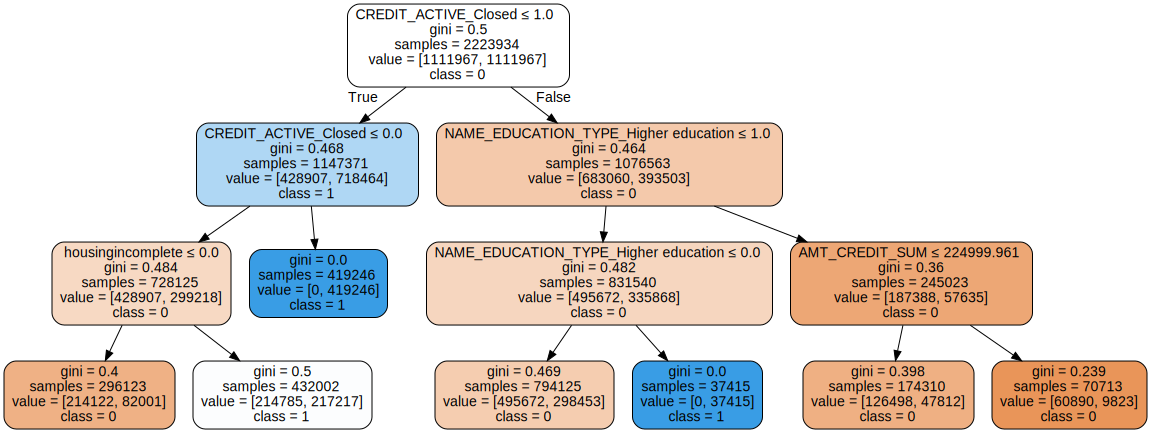

In [0]:
import graphviz
dot_data=tree.export_graphviz(dtree, out_file=None, feature_names=features.columns, class_names=['0','1'],
                             filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [0]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred_dtree))
# getting the classification Accuracy. How often is the classifier correct
print('Classification Accuracy:', metrics.accuracy_score(y_test, y_pred_dtree)) 

# getting the misclassification rate. How often is the classifier incorrect
print('Misclassification Rate:',1 - metrics.accuracy_score(y_test, y_pred_dtree))

# Getting the Sensitivity. How often out of all the positive predictions are correct predictions
# ie how sensitive is the classifier to detect positive instances
print('Sensitivity/Recall:',metrics.recall_score(y_test, y_pred_dtree))

# Getting the Specificity. How often out of all the negative predictions are correct
# ie how sensitive is the classifier to detect negative instances 

[[225211  53190]
 [ 17258   6210]]
Classification Accuracy: 0.7666272455932872
Misclassification Rate: 0.2333727544067128
Sensitivity/Recall: 0.26461564683824784


- For the Decision Tree Model, it gave an accuracy of 1 on the test set despite dealing with the imbalanced class. 
- Looking at the classification matrix. In a credit risk business, business would want to lean on the safer side of detecting a potential defaulter and than actually letting him/her to take a loan. The cost of false negative are much higher than false positives
    - It shows the ratio of correct predictions to the total number of predictions. It gave a rather high classification accuracy score of 0.922
    - we would want it to be sensitive to capture more positive instances. Sensitivity is zero.

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Receiver operating characteristic')

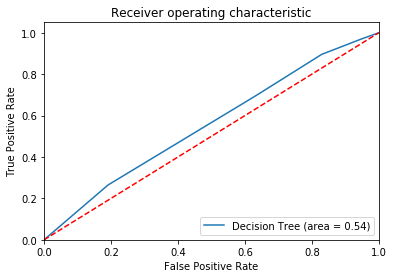

AUC value: 0.536780149308758


In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred_dtree)
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('AUC value:',metrics.roc_auc_score(y_test, y_pred_dtree))

In [0]:
from sklearn.model_selection import validation_curve
max_depth = np.arange(0, 5)
train_score, val_score = validation_curve(DecisionTreeClassifier(),features,target,
                                          'Dtree_depth',max_depth,scoring="accuracy",
                                          cv=5)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

ValueError: Invalid parameter Dtree_depth for estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

- Ways to improve the model
    - Feature selection
    - Parameter tuning
    - Relook into the business case and dataset and improve features

# Feature Selection
Top reasons to use feature selection are:

- It enables the machine learning algorithm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the right subset is chosen.
- It reduces overfitting.

Methods which I will be exploring in this kernel would be

#### Filter Methods
- High correlation features
    - Multiple variables giving similar information or variation is known as Multi-collinearity. Use Pearson/Polychoric correlation matrix to identify variables with high correlation and select using Variance Inflation Factor. VIF>5 will be dropped
    - https://etav.github.io/python/vif_factor_python.html
        
#### Embedded methods
- Variable importance/selection using Decision Trees
    - Takes into account of missing and outliers well.
        
#### Wrapper Methods

- Recursive Feature elimination
    - Greedy optimization algorithm which aims to find the best performing feature subset. Ranks the features based on order of elimination.
    
#### Synthesis
- Synthesis the top 20 variables for further analysis
    
Reference:
- https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2
- https://machinelearningmastery.com/an-introduction-to-feature-selection/
- https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/
- https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
- http://benalexkeen.com/feature-scaling-with-scikit-learn/

## One-hot encoding

In [0]:
features_cat=train_fs.select_dtypes('object')
features_cat.columns.tolist()

In [0]:
features_encoded=pd.get_dummies(features_cat, drop_first=True)
features_encoded.shape

In [0]:
features_2=pd.concat([train_fs,features_encoded],axis=1)
features_2.shape

In [0]:
features_2.drop(features_cat.columns.tolist(),axis=1,inplace=True);

In [0]:
features_2.shape

## Split Dataset to Features and Target

In [0]:
# Split the Dataset into features and target dataset
features_2.reset_index(drop=True);
features=features_2.drop(columns="TARGET").copy()
target=features_2['TARGET'].copy()
# features.shape
# target.shape
target.shape
features.shape

## Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [0]:
xTrain.shape
xTest.shape
yTrain.shape
yTest.shape

## Upsamping minority class

- Using SMOTE to upsample the minority class for the Training Dataset.(training dataset instead of complete dataset to avoid information leakage)

In [0]:
# upsampling the minor class to 1:1 using SMOTE
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='float',random_state=20,ratio=1)
X_sm, y_sm =smote.fit_resample(features,target)
smote.get_params

In [0]:
print('Resampled Training Features Shape:',X_sm.shape)
print('Resampled Training Labels Shape:',y_sm.shape)

## MultiCollinearity

- Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent.
- The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independetaly because these variables tend to change in unison.


In [0]:
features_num=features.select_dtypes('number')

In [0]:
import statsmodels.formula.api as sm
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvars_names=x_vars.columns
    VIPlist={}
    for i in range(0,vars_names.shape[0]):
        y=x_vars[xvars_names[1]]
        x=x_vars[xvars_names.drop(xvars_names[i])]
        rsq=sm.ols(formula="y-x" ,data=vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        VIFlist[vars_names[i]]=vif
        print(vars_names[i], "VIF=",vif)
    return VIFlist

In [0]:
vif_cal(input_data=features_num, dependent_col=target)

## Low Variance

In [0]:
# checking for low variance
from sklearn.feature_selection import VarianceThreshold
# Splitting into Features and Target 
df1_features=train_fs.drop('TARGET',axis=1).copy()
df1_target=train_fs.loc[:,'TARGET']
# filter out numeric and string variables
df1_features_cat= df1_features.select_dtypes(include=['category','object'])
df1_features_num= df1_features.select_dtypes(include='number')

In [0]:
df1_features_num.shape

In [0]:
# scaling our data using min-max( need to check)
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(train_fs)
scaled_df = pd.DataFrame(scaled_df)

In [0]:
#create instance
variancefilter=VarianceThreshold(threshold=0.1)

In [0]:
def variance_threshold_selector(data, threshold=0.1):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]


In [0]:
variance_threshold_selector(df1_features_num)

## High Correlations

In [0]:
correlationdata=train_fs.corr()

In [0]:
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in correlationdata:
    above_threshold_vars[col] = list(correlationdata.index[correlationdata[col] > threshold])

In [0]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove));

In [0]:
cols_to_remove

In [0]:
# correlationdata_removed = correlationdata.drop(columns = cols_to_remove)
# print('Correlations Removed Shape: ', correlationdata_removed.shape)

In [0]:
# ef correlation(dataset, threshold):
#     col_corr = set() # Set of all the names of deleted columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if corr_matrix.iloc[i, j] >= threshold:
#                 colname = corr_matrix.columns[i] # getting the name of column
#                 col_corr.add(colname)
#                 if colname in dataset.columns:
#                     del dataset[colname] # deleting the column from the dataset

#     print(dataset)

- Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values.

- Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

http://psychologicalstatistics.blogspot.com/2013/11/multicollinearity-and-collinearity-in.html

https://etav.github.io/python/vif_factor_python.html

- as there are significant missing values(NaN), variance threshold method could not be used.
- Too many variables with missing values to impute up front. 
- Discovered that Sklearn module does not handle missing values well. It returned error for RandomForestClassifier and DecisionTreeClassifier
- Reference: https://blog.datadive.net/selecting-good-features-part-iii-random-forests/

## Random Forest

In [0]:
# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# Create an instance of the Random Forest Model
rf_exp = RandomForestClassifier(n_estimators= 10,max_depth=3, random_state=42)

#Train the model on the training data
rf_exp.fit(X_sm, y_sm)

# Get numerical feature importances
importances = list(rf_exp.feature_importances_)

# List of tuples with variable and importance
feature_list=list(features.columns)
feature_importances = [(X_sm, round(importance, 2)) for X_sm, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: CREDIT_ACTIVE_Closed Importance: 0.16
Variable: CREDIT_ACTIVE_Active Importance: 0.14
Variable: CODE_GENDER_M        Importance: 0.11
Variable: REG_CITY_NOT_WORK_CITY Importance: 0.09
Variable: DAYS_CREDIT_UPDATE   Importance: 0.06
Variable: NAME_INCOME_TYPE_Working Importance: 0.06
Variable: REGION_RATING_CLIENT Importance: 0.04
Variable: OBS_60_CNT_SOCIAL_CIRCLE Importance: 0.04
Variable: NAME_EDUCATION_TYPE_Secondary / secondary special Importance: 0.04
Variable: FLAG_PHONE           Importance: 0.03
Variable: housingincomplete    Importance: 0.03
Variable: DAYS_CREDIT          Importance: 0.03
Variable: NAME_EDUCATION_TYPE_Higher education Importance: 0.03
Variable: ORGANIZATION_TYPE_Business Entity Type 3 Importance: 0.03
Variable: REGION_POPULATION_RELATIVE Importance: 0.02
Variable: FLAG_OWN_CAR_Y       Importance: 0.02
Variable: NAME_INCOME_TYPE_Commercial associate Importance: 0.02
Variable: WEEKDAY_APPR_PROCESS_START_TUESDAY Importance: 0.02
Variable: CREDIT_TYPE_Cr

In [0]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:6]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

In [0]:
def permutation_importances(rf, features, target, metric):
    baseline = metric(rf, features, target)
    imp = []
    for col in features.columns:
        save = features[col].copy()
        features[col] = np.random.permutation(features[col])
        m = metric(rf, features, target)
        features[col] = save
        imp.append(baseline - m)
    return np.array(imp)

In [0]:
rf = RandomForestClassifier(n_estimators= 10,max_depth=3, random_state=42)
imp = permutation_importances(rf, features, target,
                              oob_classifier_accuracy)

# Hyperparameter Tuning

In [0]:
from sklearn.model_selection import RandomizedSearchCV

#maximum number of fetures to consider for making splits
max_features = ['auto','sqrt','log2']

#max depth of each tree
max_depth = [2,3,5,6,8]

#min number of samples to split a node
min_samples_split=[2,4,6,8]

#min number if samples per leaf
min_samples_leaf = [2,4,6,8]

#define the grid of hyperparameters to search
hyperparameter_DT={'max_features':max_features,
                  'max_depth': max_depth,
                  'min_samples_leaf': min_samples_leaf,
                  'min_samples_split': min_samples_split}
print(hyperparameter_DT)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 5, 6, 8], 'min_samples_leaf': [2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8]}


In [0]:
DT_hyper = DecisionTreeClassifier()

#set up the random search with 4-fold cross validation

DT_cv = RandomizedSearchCV(estimator=DT_hyper,
                          param_distributions=hyperparameter_DT,
                          cv=1,
                          n_iter=50,
                          scoring='roc_auc',
                          n_jobs=2,
                          verbose=1,
                          return_train_score = True,
                          random_state=42
                            )

#Train the model on training data
DT_cv.fit(X_sm, y_sm)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 56.4min


# Model Building

In [0]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(X_sm, y_sm)

In [0]:
from sklearn.tree import DecisionTreeClassifier
X = df1_features_num
Y = df1_target
names = list(df1_features.columns.values)
rf = DecisionTreeClassifier()
rf.fit(X, Y)
print ("Features sorted by their score:",sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

- how to combine insights from multiple feature selection methods
- example impute median
- https://www.kaggle.com/sz8416/6-ways-for-feature-selection